**Import the Dataset  -  aud.csv**
This is a dataset containing information about audiobooks sold on audible.com.

In [240]:
import pandas as pd
import numpy as np
import re
# read datasdet using pandas
df = pd.read_csv('aud.csv')
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


Check how many rows and columns are in the dataset.

In [241]:
df.shape

(87489, 8)

Here I wanted to see what data type is represented in each column. However, te return is object for all without showing object type.

In [242]:
print(df.dtypes)

name           object
author         object
narrator       object
time           object
releasedate    object
language       object
stars          object
price          object
dtype: object


The 'releasedate' column has been converted to a pandas datetime object and display below, i.e. formatted as a date.

In [243]:
df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')

# Display the updated data types
print(df.dtypes)

name                   object
author                 object
narrator               object
time                   object
releasedate    datetime64[ns]
language               object
stars                  object
price                  object
dtype: object


In [244]:
df.head(10)
#df.tail(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,2008-04-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,2018-10-30,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,2014-11-25,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,2017-02-05,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,2017-02-05,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,2019-09-24,English,5 out of 5 stars58 ratings,820.00


After further investigation, this for loop implementing the type() function in python is found to be more consistant and detailed when considering type. I will give examples of this later as needed.

In [245]:
for column in df.columns:
    print(f"Column: {column}, Type: {type(df[column][0])}")

Column: name, Type: <class 'str'>
Column: author, Type: <class 'str'>
Column: narrator, Type: <class 'str'>
Column: time, Type: <class 'str'>
Column: releasedate, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column: language, Type: <class 'str'>
Column: stars, Type: <class 'str'>
Column: price, Type: <class 'str'>


The following 2 methods are called to examine the possibility of the same books having been entered multiple times in the dataset. This seems to be the case.

In [246]:
df.nunique()

name           82767
author         48374
narrator       29717
time            2284
releasedate     5058
language          36
stars            665
price           1011
dtype: int64

In [247]:
df.describe()

<ipython-input-247-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,name,author,narrator,time,releasedate,language,stars,price
count,87489,87489,87489,87489,87489,87489,87489,87489
unique,82767,48374,29717,2284,5058,36,665,1011
top,The Art of War,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,2018-05-16 00:00:00,English,Not rated yet,586.00
freq,20,874,1034,372,773,61884,72417,5533
first,NaN,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN,NaN


This code eliminates the duplicates from the 'name' column and the describe() method shows the count and the unique count to be the same.

In [248]:
df = df.drop_duplicates(subset=['name'])

df.describe()

<ipython-input-248-5daf53abe7b2>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,name,author,narrator,time,releasedate,language,stars,price
count,82767,82767,82767,82767,82767,82767,82767,82767
unique,82767,47024,28650,2231,4978,36,618,995
top,Geronimo Stilton #11 & #12,"Writtenby:矢島雅弘,石橋遊",Narratedby:anonymous,2 mins,2018-05-16 00:00:00,English,Not rated yet,586.00
freq,1,874,1013,361,772,57693,68841,5277
first,NaN,NaN,NaN,NaN,1998-12-27 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2025-11-14 00:00:00,NaN,NaN,NaN


This code returns a count of the null entries in each column. There are none but only because the columns are string information and instead of null value there are string values like "Free" and "Not reviewed yet". These will be null values when these columns are converted to numeric values.

In [249]:
df.isnull().sum()

name           0
author         0
narrator       0
time           0
releasedate    0
language       0
stars          0
price          0
dtype: int64

There is unnecessary leading text in the 'author' and 'narrator' columns, i.e. "Writtenby" and "Narratedby", which the following code removes.

In [250]:
df['author'] = df['author'].str.replace('Writtenby:', '', case=False)
df['narrator'] = df['narrator'].str.replace('Narratedby:', '', case=False)

df.tail()

,name,author,narrator,time,releasedate,language,stars,price
87483,We Stood upon Stars,RogerW.Thompson,JohnMcLain,5 hrs and 55 mins,2017-02-05,English,Not rated yet,351.00
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,7 hrs and 34 mins,2017-09-03,English,Not rated yet,596.00
87485,The Alps,StephenO'Shea,RobertFass,10 hrs and 7 mins,2017-02-21,English,Not rated yet,820.00
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,4 hrs and 8 mins,2011-02-23,English,Not rated yet,680.00
87488,Havana,MarkKurlansky,FleetCooper,6 hrs and 1 min,2017-07-03,English,Not rated yet,569.00


This is a little more complex and looked on Kaggle.com for inspiration. The string information containing the number of hours and minutes should be represented as a numeric field containing only total minutes.

In [251]:
def convert_to_minutes(time_str):
    if 'hr' in time_str and 'min' in time_str:
        # Extract hours and minutes separately
        hours, mins = map(int, re.findall(r'\d+', time_str))
        return hours * 60 + mins
    elif 'hr' in time_str:
        # Extract hours only
        hours = int(re.search(r'\d+', time_str).group())
        return hours * 60
    elif 'min' in time_str:
        # Extract minutes only
        mins = int(re.search(r'\d+', time_str).group())
        return mins
    else:
        return None  # Handle cases with no specified time

# Apply the conversion function to the 'time' column
df['time'] = df['time'].apply(convert_to_minutes)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82767 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         82767 non-null  object        
 1   author       82767 non-null  object        
 2   narrator     82767 non-null  object        
 3   time         82767 non-null  int64         
 4   releasedate  82767 non-null  datetime64[ns]
 5   language     82767 non-null  object        
 6   stars        82767 non-null  object        
 7   price        82767 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 5.7+ MB


In [252]:
for column in df.columns:
    print(f"Column: {column}, Type: {type(df[column][0])}")

Column: name, Type: <class 'str'>
Column: author, Type: <class 'str'>
Column: narrator, Type: <class 'str'>
Column: time, Type: <class 'numpy.int64'>
Column: releasedate, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column: language, Type: <class 'str'>
Column: stars, Type: <class 'str'>
Column: price, Type: <class 'str'>


In [253]:
df.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00


Rating out of 5 stars and the total number of ratings received can be found in the 'stars' column. The following code extracts the numeric information from the string data by extracting numbers found before following string characters.

In [254]:
# Ensure 'stars' is a string
df['stars'] = df['stars'].astype(str)

# Create 2 new columns extracting information from 'stars'
df['rating'] = df['stars'].str.extract(r'(\d+\.\d+|\d+) out of 5 stars')
df['totalRatings'] = df['stars'].str.extract(r'(\d+) ratings')

# Replace "Not rated yet" with NaN in the 'totalRatings' column
df['totalRatings'] = df['totalRatings'].replace('Not rated yet', pd.NA)

# Replace "Not rated yet" with NaN in the 'rating' column
df['rating'].replace('Not rated yet', pd.NA, inplace=True)

# Convert the 'rating' column to numeric format
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Convert the 'totalRatings' column to numeric format and nullable integer type
df['totalRatings'] = pd.to_numeric(df['totalRatings'], errors='coerce').astype('Int64')

# Drop the original 'stars' column
df.drop(columns=['stars'], inplace=True)

df.head()

,name,author,narrator,time,releasedate,language,price,rating,totalRatings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,468.00,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,820.00,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,410.00,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,615.00,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820.00,4.5,181


Here the creation of 2 new columns containing desired numeric data is confirmed.

In [255]:
for column in df.columns:
    print(f"Column: {column}, Type: {type(df[column][0])}")

Column: name, Type: <class 'str'>
Column: author, Type: <class 'str'>
Column: narrator, Type: <class 'str'>
Column: time, Type: <class 'numpy.int64'>
Column: releasedate, Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Column: language, Type: <class 'str'>
Column: price, Type: <class 'str'>
Column: rating, Type: <class 'numpy.float64'>
Column: totalRatings, Type: <class 'numpy.int64'>


This code removes commas from the price string data and converts the string to a number. The new 'rating' and 'totalRatings' columns, as well as the number formatting in the price column, can be seen in the df.head(10) below.

In [256]:
df['price'] = df['price'].astype(str)
df['price'] = pd.to_numeric(df['price'].str.replace(',', ''), errors='coerce')

df.head(10)

,name,author,narrator,time,releasedate,language,price,rating,totalRatings
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,468.0,5.0,34
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,820.0,4.5,41
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,410.0,4.5,38
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,615.0,4.5,12
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820.0,4.5,181
5,The Hunger Games: Special Edition,SuzanneCollins,TatianaMaslany,635,2018-10-30,English,656.0,5.0,72
6,Quest for the Diamond Sword,WinterMorgan,LukeDaniels,143,2014-11-25,English,233.0,5.0,11
7,The Dark Prophecy,RickRiordan,RobbieDaymond,752,2017-02-05,English,820.0,5.0,50
8,Merlin Mission Collection,MaryPopeOsborne,MaryPopeOsborne,656,2017-02-05,English,1256.0,5.0,5
9,The Tyrant’s Tomb,RickRiordan,RobbieDaymond,802,2019-09-24,English,820.0,5.0,58


In [257]:
df.isnull().sum()

name                0
author              0
narrator            0
time                0
releasedate         0
language            0
price             327
rating          68841
totalRatings    74228
dtype: int64

For entries in the 'rating' column which were "Not yet reviewed" and are now NaN, NaN values are replaced with the mode value.
df.isnull().sum() checks no null values in the 'ratings' column.

In [258]:
modeRatings = df['rating'].mode().values[0]
df['rating']= df['rating'].replace(np.nan, modeRatings)

df.isnull().sum()

name                0
author              0
narrator            0
time                0
releasedate         0
language            0
price             327
rating              0
totalRatings    74228
dtype: int64

On consultation with an expert, it was decided that it would not make sense to use a mode value for <Na> values in the 'totalRatings' column, nor would it be appropriate to use zero. <Na> values have been replaced with minus 1.

In [259]:
noReviews = -1

df['totalRatings']= df['totalRatings'].replace(np.nan, noReviews)

df.isnull().sum()

name              0
author            0
narrator          0
time              0
releasedate       0
language          0
price           327
rating            0
totalRatings      0
dtype: int64

When changing the 'price' column to numeric format, there were 327 "Free" entries in the dataset. Below, these now NaN entries are replaced with zero.

In [260]:
free = 0

df['price']= df['price'].replace(np.nan, free)

df.isnull().sum()

name            0
author          0
narrator        0
time            0
releasedate     0
language        0
price           0
rating          0
totalRatings    0
dtype: int64

A check that formatted data types are consistant and correct.

In [261]:
print(df.dtypes)

name                    object
author                  object
narrator                object
time                     int64
releasedate     datetime64[ns]
language                object
price                  float64
rating                 float64
totalRatings             Int64
dtype: object


In [262]:
print(df['releasedate'].isnull().sum())

0


**Univariate Analysis**
Below 2 histograms show the total number of audiobooks and their prices.
The original chart on the left sets the price axis too high so this has been shortened to focus on the relevant price range.

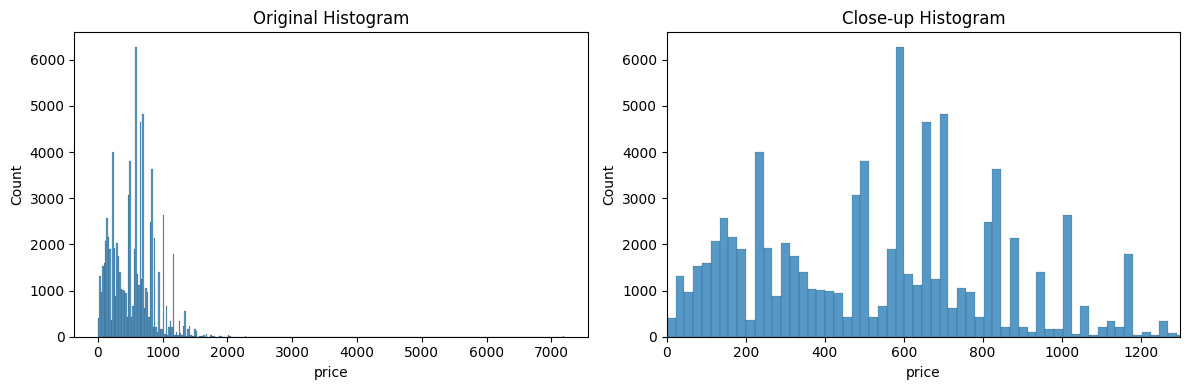

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up to add 2 graphs side-by-side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the original histogram on the first subplot
sns.histplot(x='price', data=df, ax=axes[0])
axes[0].set_title('Original Histogram')

# Plot the modified histogram on the second subplot
sns.histplot(x='price', data=df, ax=axes[1])
axes[1].set_xlim(0, 1300)  # Set the desired x-axis range
axes[1].set_title('Close-up Histogram')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Bivariate Analysis**
The histogram on the left is a univariate analysis of the frequency of ratings entries. On the right then shows the bivariate comparison of price to rating. This shows a higher number of 5-star ratings recieve a higher price.

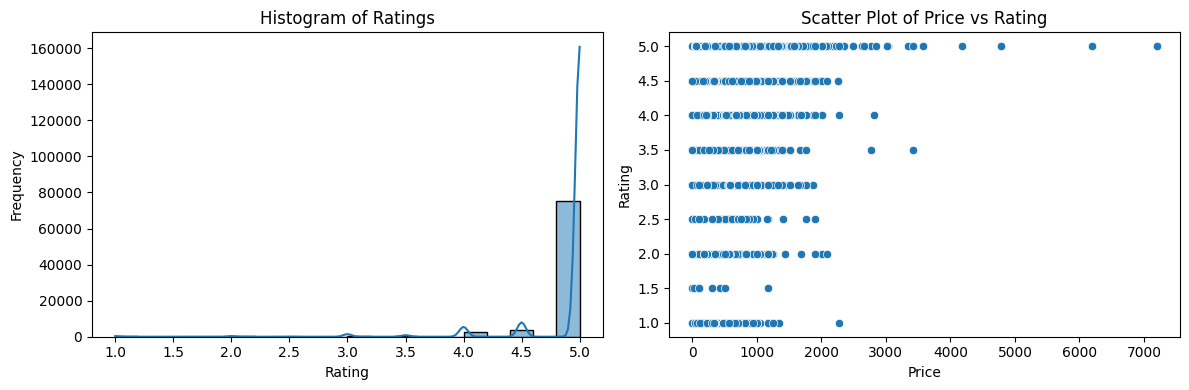

In [264]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Create a histogram of the 'rating' column on the first subplot
sns.histplot(df['rating'], kde=True, bins=20, ax=axes[0])  # Adjust 'bins' as needed
axes[0].set_title('Histogram of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Frequency')

# Create a scatter plot of 'price' vs 'rating' on the second subplot
sns.scatterplot(x='price', y='rating', data=df, ax=axes[1])
axes[1].set_title('Scatter Plot of Price vs Rating')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Rating')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

**Multivariate Analysis**
A heat map has been created which shows a medium correlation between the time(length) of an audiobook and the price charged.

<ipython-input-265-c11ab01d77c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


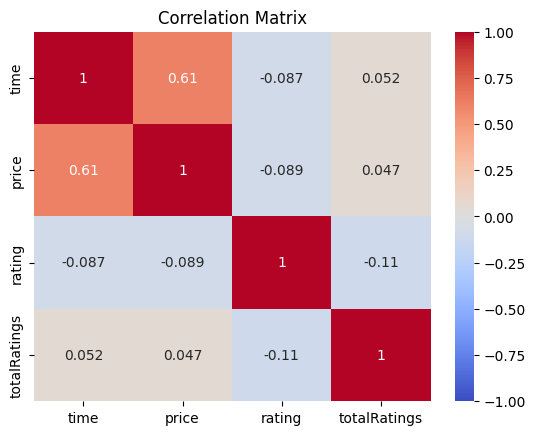

In [265]:
# Assuming df is your DataFrame
corr_matrix = df.corr()

# Set vmin and vmax to -1 and 1 to control the color range
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()

**Time-Series Analysis**
A lineplot was used to show the relationship between the release date and the price. A significant price spike can be seen around the year 2000. Another can be observed in 2024 where supposedly new titles recieve a higher price although data for this current year is not yet complete.

<ipython-input-266-52566de48eee>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  resampled_df = df.resample('M').mean()  # You can choose a different frequency like 'D' for daily, 'Y' for yearly, etc.


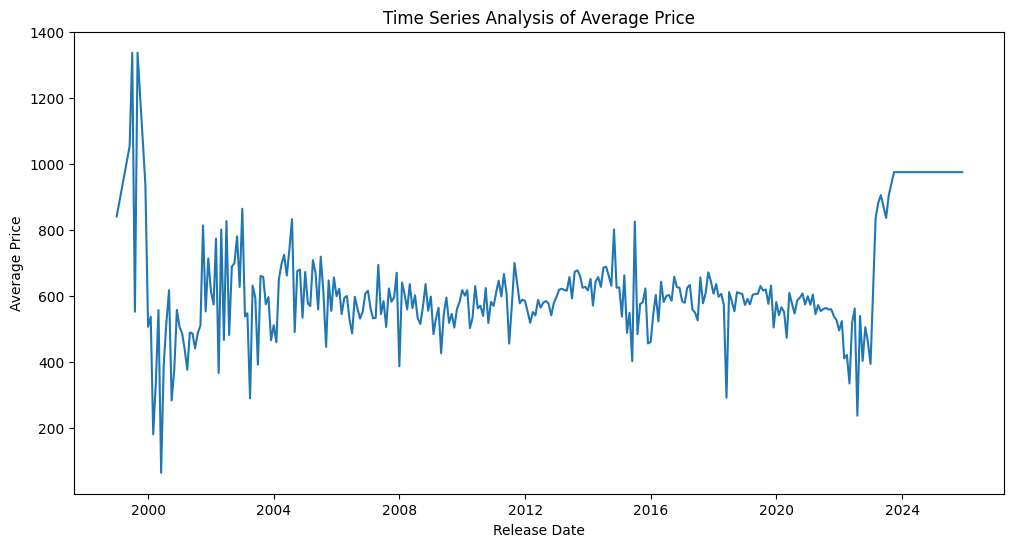

In [266]:
# Set 'releasedate' as the index for time-series analysis
df.set_index('releasedate', inplace=True)

# Resample the data by a specific time frequency (e.g., monthly)
resampled_df = df.resample('M').mean()  # You can choose a different frequency like 'D' for daily, 'Y' for yearly, etc.

# Plot the time series of average prices
plt.figure(figsize=(12, 6))
sns.lineplot(x=resampled_df.index, y=resampled_df['price'])
plt.title('Time Series Analysis of Average Price')
plt.xlabel('Release Date')
plt.ylabel('Average Price')
plt.show()

Further time-series analysis was carried out to try to observe outliers in price. Since too many years were present in the 'releasedate' column, the years on the x-axis were grouped to facilitate visualization.

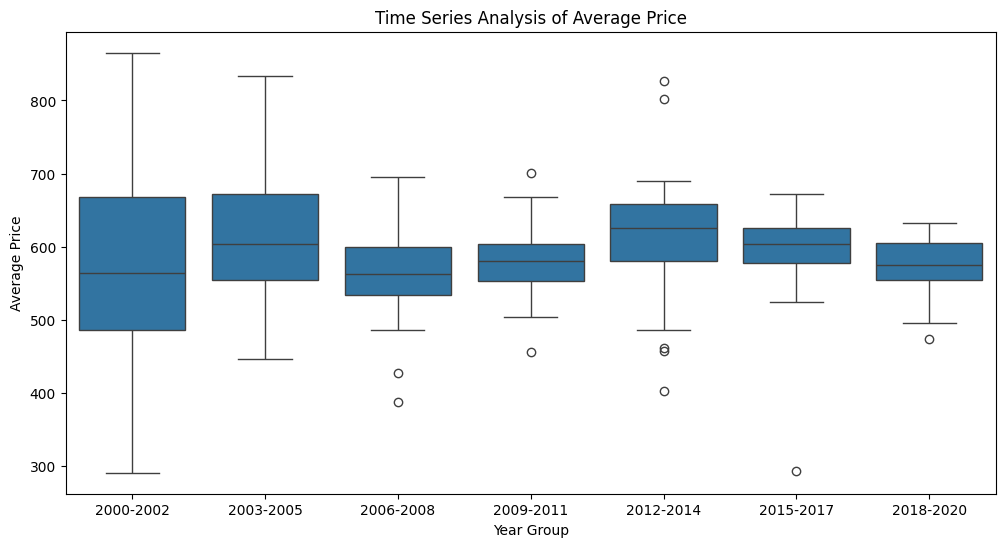

In [267]:
# Filter out years 2024 and 2025
filtered_df = resampled_df[~resampled_df.index.year.isin([2024, 2025])].copy()

# Create a new column 'year_group' to represent 3-year blocks using .loc
bins = range(2000, 2024, 3)
labels = [f"{year}-{year+2}" for year in range(2000, 2021, 3)]
filtered_df.loc[:, 'year_group'] = pd.cut(filtered_df.index.year, bins=bins, labels=labels)

# Plot the boxplot with the modified x-axis
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_group', y='price', data=filtered_df)
plt.title('Time Series Analysis of Average Price')
plt.xlabel('Year Group')
plt.ylabel('Average Price')
plt.show()

Here it was difficult to reproduce the same boxplot eliminating outliers. Duplicates were eliminated from the temporarily created 'year_group' to enable the visualization.

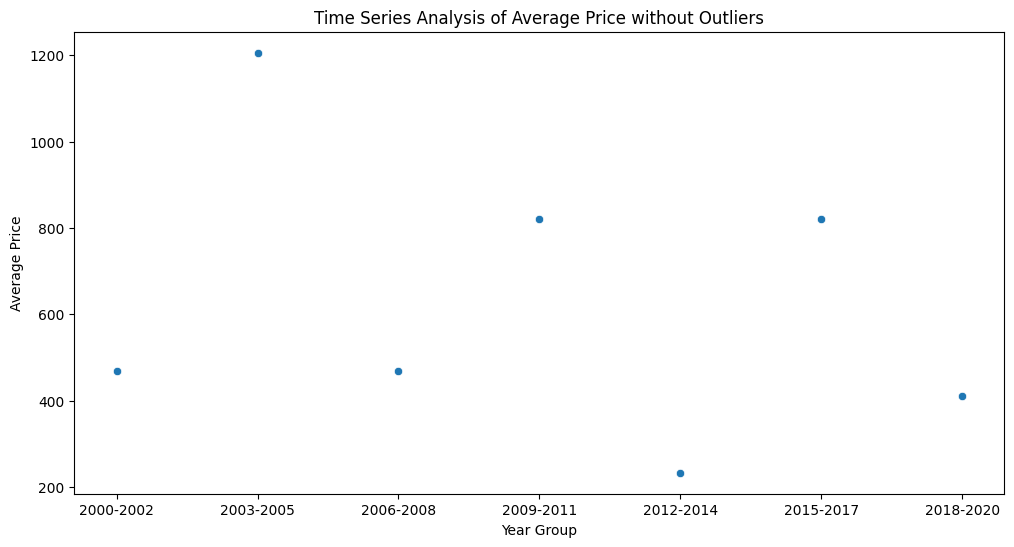

In [268]:
# Calculate 1st & 3rd & IQR of 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate pper bound
upper_bound = Q3 + 1.5 * IQR

# Calculate lower bound
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['price'] > lower_bound) & (df['price'] < upper_bound)]

# Filter out years 2024 and 2025
filteredDf = df_no_outliers[~df_no_outliers.index.year.isin([2024, 2025])].copy()

# Create a new column 'year_group' to represent 3-year blocks using .loc
bins = range(2000, 2024, 3)
labels = [f"{year}-{year+2}" for year in range(2000, 2021, 3)]
filteredDf.loc[:, 'year_group'] = pd.cut(filteredDf.index.year, bins=bins, labels=labels)

# Drop duplicates from the 'year_group' column
filteredDf = filteredDf.drop_duplicates('year_group')

# Plot the boxplot with the modified x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year_group', y='price', data=filteredDf)
plt.title('Time Series Analysis of Average Price without Outliers')
plt.xlabel('Year Group')
plt.ylabel('Average Price')
plt.show()

In [269]:
df.describe()

,time,price,rating,totalRatings
count,82767.000000,82767.000000,82767.000000,82767.0
mean,414.169911,556.030555,4.908695,1.501867
std,362.587844,336.012421,0.358875,24.494952
min,1.000000,0.000000,1.000000,-1.0
25%,138.000000,267.000000,5.000000,-1.0
50%,384.000000,585.000000,5.000000,-1.0
75%,582.000000,754.000000,5.000000,-1.0
max,8595.000000,7198.000000,5.000000,985.0


In [270]:
df.head()

,name,author,narrator,time,language,price,rating,totalRatings
releasedate,,,,,,,,
2008-04-08,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,English,468.0,5.0,34
2018-01-05,The Burning Maze,RickRiordan,RobbieDaymond,788,English,820.0,4.5,41
2020-06-11,The Deep End,JeffKinney,DanRussell,123,English,410.0,4.5,38
2021-05-10,Daughter of the Deep,RickRiordan,SoneelaNankani,676,English,615.0,4.5,12
2010-01-13,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,English,820.0,4.5,181
